<a href="https://colab.research.google.com/github/DiproHaque/Project-DIY--/blob/main/PlayGround.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)0

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize']=[10,5]

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving financial_anomaly_data.csv to financial_anomaly_data.csv


In [ ]:
df = pd.read_csv("financial_anomaly_data.csv")
df.head()
df.shape

(217441, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217441 entries, 0 to 217440
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Timestamp        216960 non-null  object 
 1   TransactionID    216960 non-null  object 
 2   AccountID        216960 non-null  object 
 3   Amount           216960 non-null  float64
 4   Merchant         216960 non-null  object 
 5   TransactionType  216960 non-null  object 
 6   Location         216960 non-null  object 
dtypes: float64(1), object(6)
memory usage: 11.6+ MB


In [ ]:
df.isnull().sum()

,0
Timestamp,481
TransactionID,481
AccountID,481
Amount,481
Merchant,481
TransactionType,481
Location,481


In [ ]:
df=df.dropna()
df.shape

(216960, 7)

In [ ]:
df.columns

Index(['Timestamp', 'TransactionID', 'AccountID', 'Amount', 'Merchant',
       'TransactionType', 'Location'],
      dtype='object')

In [ ]:
df.nunique()

,0
Timestamp,216960
TransactionID,1999
AccountID,15
Amount,214687
Merchant,10
TransactionType,3
Location,5


In [ ]:
import datetime

In [ ]:
from datetime import datetime

In [ ]:
date_string = "01-01-2023 08:00"
time_series_format = datetime.strptime(date_string, "%d-%m-%Y %H:%M")
print(time_series_format)

2023-01-01 08:00:00


In [ ]:
def time_format(x):
  time_series_format = datetime.strptime(x, "%d-%m-%Y %H:%M")
  return time_series_format

In [ ]:
time_format ("01-01-2023 08:00")

datetime.datetime(2023, 1, 1, 8, 0)

In [ ]:
df['Timestamp'] = df['Timestamp'].apply(time_format)
df.head()

,Timestamp,TransactionID,AccountID,Amount,Merchant,TransactionType,Location
0,2023-01-01 08:00:00,TXN1127,ACC4,95071.92,MerchantH,Purchase,Tokyo
1,2023-01-01 08:01:00,TXN1639,ACC10,15607.89,MerchantH,Purchase,London
2,2023-01-01 08:02:00,TXN872,ACC8,65092.34,MerchantE,Withdrawal,London
3,2023-01-01 08:03:00,TXN1438,ACC6,87.87,MerchantE,Purchase,London
4,2023-01-01 08:04:00,TXN1338,ACC6,716.56,MerchantI,Purchase,Los Angeles


In [ ]:
df=df.set_index('Timestamp')
df.head()

,TransactionID,AccountID,Amount,Merchant,TransactionType,Location
Timestamp,,,,,,
2023-01-01 08:00:00,TXN1127,ACC4,95071.92,MerchantH,Purchase,Tokyo
2023-01-01 08:01:00,TXN1639,ACC10,15607.89,MerchantH,Purchase,London
2023-01-01 08:02:00,TXN872,ACC8,65092.34,MerchantE,Withdrawal,London
2023-01-01 08:03:00,TXN1438,ACC6,87.87,MerchantE,Purchase,London
2023-01-01 08:04:00,TXN1338,ACC6,716.56,MerchantI,Purchase,Los Angeles


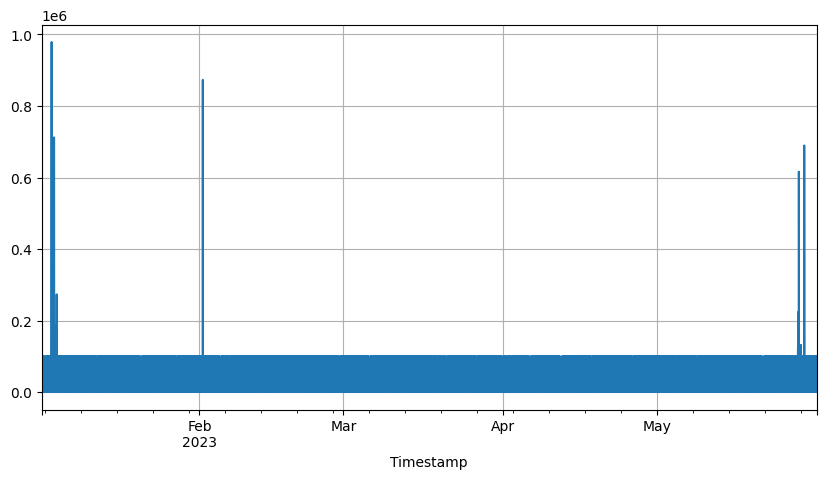

In [ ]:
df['Amount'].plot()
plt.grid()
plt.show()

In [ ]:
df['TransactionID'].nunique()

1999

In [ ]:
df['AccountID'].nunique()

15

In [ ]:
df.groupby(['AccountID'])['TransactionID'].count()

,TransactionID
AccountID,
ACC1,14365
ACC10,14362
ACC11,14446
ACC12,14421
ACC13,14421
ACC14,14458
ACC15,14701
ACC2,14553
ACC3,14285


In [ ]:
for i,j in zip(df.groupby(['AccountID'])['TransactionID'].count().index,df.groupby(['AccountID'])['TransactionID'].count().values):
  print(f"The total transactions for account {i} is {j}")

The total transactions for account ACC1 is 14365
The total transactions for account ACC10 is 14362
The total transactions for account ACC11 is 14446
The total transactions for account ACC12 is 14421
The total transactions for account ACC13 is 14421
The total transactions for account ACC14 is 14458
The total transactions for account ACC15 is 14701
The total transactions for account ACC2 is 14553
The total transactions for account ACC3 is 14285
The total transactions for account ACC4 is 14456
The total transactions for account ACC5 is 14630
The total transactions for account ACC6 is 14352
The total transactions for account ACC7 is 14581
The total transactions for account ACC8 is 14402
The total transactions for account ACC9 is 14527


In [ ]:
for i,j in zip(df.groupby(['AccountID'])['Amount'].mean().index,
               df.groupby(['AccountID'])['Amount'].mean().values):
  print(f"The Average transactions for account {i} is {j}")

The Average transactions for account ACC1 is 50428.5296484511
The Average transactions for account ACC10 is 49729.92767581117
The Average transactions for account ACC11 is 49662.176511837184
The Average transactions for account ACC12 is 50272.45223840233
The Average transactions for account ACC13 is 50538.807350391784
The Average transactions for account ACC14 is 50013.096792087425
The Average transactions for account ACC15 is 50371.89460580913
The Average transactions for account ACC2 is 50047.96155225727
The Average transactions for account ACC3 is 49910.79913545677
The Average transactions for account ACC4 is 49623.77805962922
The Average transactions for account ACC5 is 50194.70615584415
The Average transactions for account ACC6 is 50038.08343297101
The Average transactions for account ACC7 is 50079.504645086075
The Average transactions for account ACC8 is 50481.295046521314
The Average transactions for account ACC9 is 49952.37602257865


In [ ]:
df['Amount'].max(),df['Amount'].min()

(978942.26, 10.51)

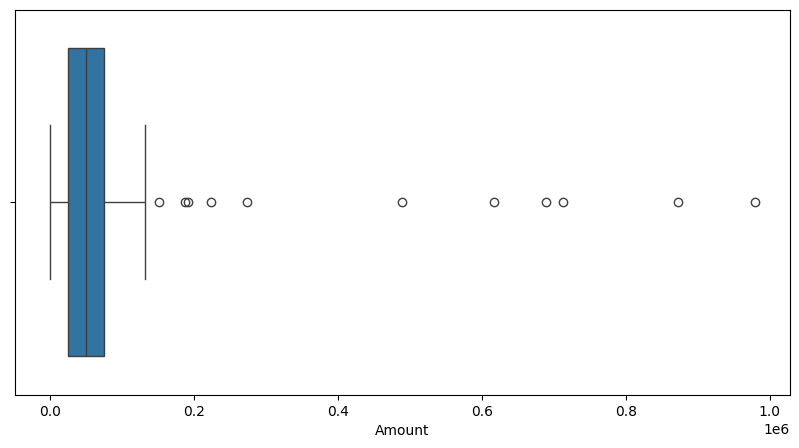

In [ ]:
sns.boxplot(x=df['Amount'])
plt.show()

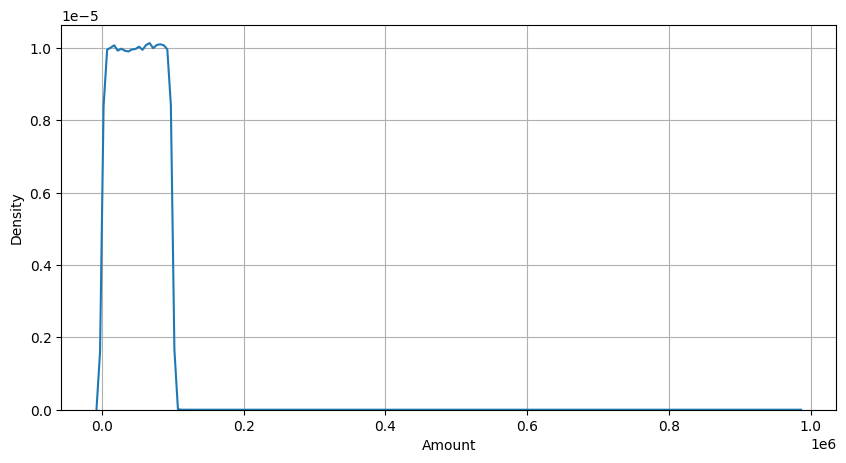

In [ ]:
sns.kdeplot(x=df['Amount'])
plt.grid()
plt.show()

In [ ]:
df.columns

Index(['TransactionID', 'AccountID', 'Amount', 'Merchant', 'TransactionType',
       'Location'],
      dtype='object')

In [ ]:
print ("The details for minimum transaction are : \n")

for i,j in zip(df.columns, df[df['Amount']==df['Amount'].min()].values[0]):
    print (f"{i} : {j}")

The details for minimum transaction are : 

TransactionID : TXN1805
AccountID : ACC1
Amount : 10.51
Merchant : MerchantD
TransactionType : Purchase
Location : London


In [ ]:
print ("The details for maximum transaction are : \n")

for i,j in zip(df.columns, df[df['Amount']==df['Amount'].max()].values[0]):
    print (f"{i} : {j}")

The details for maximum transaction are : 

TransactionID : TXN1049
AccountID : ACC14
Amount : 978942.26
Merchant : MerchantJ
TransactionType : Transfer
Location : New York


In [ ]:
df.head()

,TransactionID,AccountID,Amount,Merchant,TransactionType,Location
Timestamp,,,,,,
2023-01-01 08:00:00,TXN1127,ACC4,95071.92,MerchantH,Purchase,Tokyo
2023-01-01 08:01:00,TXN1639,ACC10,15607.89,MerchantH,Purchase,London
2023-01-01 08:02:00,TXN872,ACC8,65092.34,MerchantE,Withdrawal,London
2023-01-01 08:03:00,TXN1438,ACC6,87.87,MerchantE,Purchase,London
2023-01-01 08:04:00,TXN1338,ACC6,716.56,MerchantI,Purchase,Los Angeles


In [ ]:
amt = pd.Series(np.random.random_integers(0,1000000,size=df.shape[0]))

amt

,0
0,877465
1,13467
2,494104
3,647843
4,930572
...,...
216955,438235
216956,694836
216957,922557
216958,337259


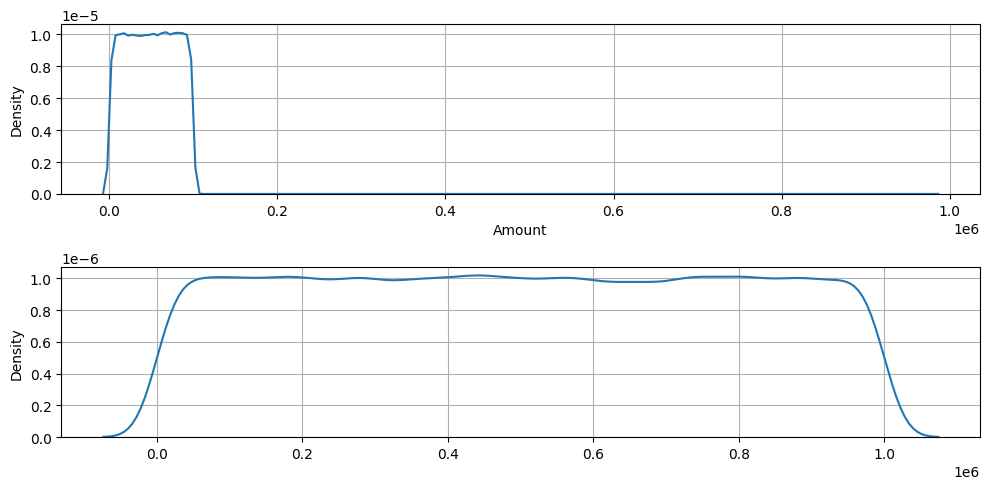

In [ ]:
plt.subplot(2,1,1)
sns.kdeplot(df['Amount'])
plt.grid()
plt.subplot(2,1,2)
sns.kdeplot(amt)
plt.grid()

plt.tight_layout()
plt.show()

In [ ]:
q1 = df['Amount'].quantile(0.25)
q3 = df['Amount'].quantile(0.75)
iqr = q3-q1
l1 = q1 - (1.5*iqr)
u1 = q3 + (1.5*iqr)

In [ ]:
print (l1)
print(u1)

-49967.58374999998
150109.28624999998


In [ ]:
trigger_list = []

for i in df['Amount'] :
  if i>u1:
    trigger_list.append("Exceeding")
  else :
    trigger_list.append("Not Exceeding")

In [ ]:
len(trigger_list)

216960

In [ ]:
trigger_df = pd.DataFrame({'Amount':df['Amount'], 'trigger' : trigger_list})
trigger_df.head()

,Amount,trigger
Timestamp,,
2023-01-01 08:00:00,95071.92,Not Exceeding
2023-01-01 08:01:00,15607.89,Not Exceeding
2023-01-01 08:02:00,65092.34,Not Exceeding
2023-01-01 08:03:00,87.87,Not Exceeding
2023-01-01 08:04:00,716.56,Not Exceeding


In [ ]:
trigger_df['trigger'].value_counts()

,count
trigger,
Not Exceeding,216949
Exceeding,11


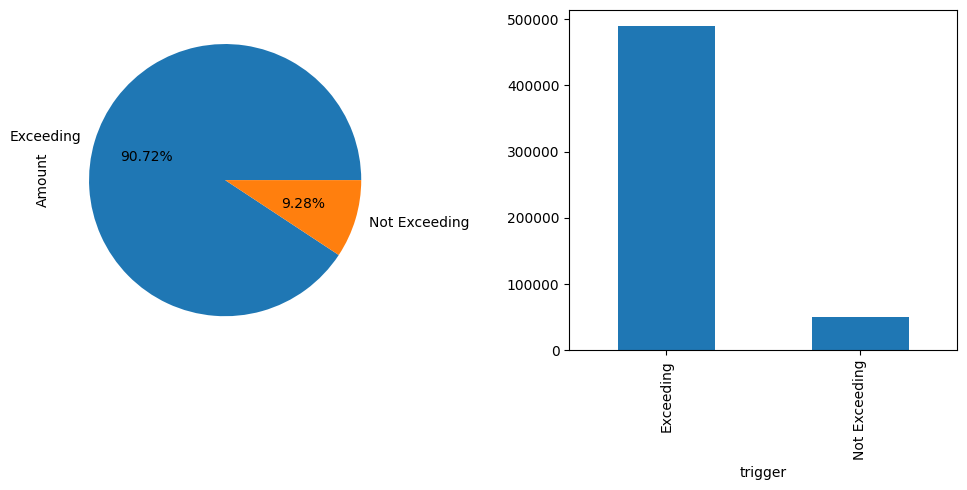

In [ ]:
plt.subplot(1,2,1)
trigger_df.groupby('trigger')['Amount'].mean().plot(kind='pie',autopct = '%0.2f%%')
plt.subplot(1,2,2)
trigger_df.groupby('trigger')['Amount'].median().plot(kind='bar')

plt.tight_layout()
plt.show()

In [ ]:
# The average exceeding limit amount accounts for 90.72% while non-exceeding amount accounts for 9.28%
# The exceeding limit is based on the upperlimit for the distribution of "Amount".